In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Case #2 - USC Recruiting Strategy Case - DATA - sept 2018.xlsx', index_col = 0)
df.head()

,application term,degree posted,application received date,file status completed date,decision date,application cleaned date,deposit received date,department,undergraduate gpa,self reported gpa,...,ready for director review,follow up required,90041_mi,91601_mi,92122_mi,94607_mi,account id,last 60/90 gpa,graduate gpa,temperature
opportunity id,,,,,,,,,,,,,,,,,,,,,
006a000000ys35ZAAQ,Fall 2013,NaN,2013-01-07,2013-02-12,2013-04-03,2013-05-14,NaT,NaN,0.00,NaN,...,False,False,26.135814,27.001180,91.506402,356.534872,001a000001Hv8cmAAB,0.0,NaN,NaN
006a000000ys34TAAQ,Fall 2013,2010-05-21 00:00:00,2013-01-11,2013-01-29,2013-04-03,2013-05-14,2013-04-23,NaN,0.00,NaN,...,False,False,8.607256,18.507157,100.492801,348.467633,001a000001Hv8beAAB,0.0,NaN,NaN
006a000000zHwSbAAK,Fall 2013,2007-01-05 00:00:00,2013-03-15,2013-05-13,2013-06-06,2013-04-18,NaT,NaN,2.00,NaN,...,False,False,14.112139,17.312897,96.109994,351.040530,001a000001J4NikAAF,2.2,NaN,NaN
006a000000zHwOIAA0,Fall 2013,NaN,2013-03-14,2013-03-14,2013-04-24,2013-04-23,NaT,NaN,0.00,NaN,...,False,False,8.872769,10.958503,102.041263,345.138712,001a000001J4NeYAAV,0.0,NaN,NaN
006a000000zHwQgAAK,Fall 2013,2011-01-31 00:00:00,2013-03-11,2013-07-09,2013-07-09,2013-03-25,NaT,NaN,2.01,NaN,...,False,False,30.434642,36.394601,76.712759,370.439711,001a000001J4NgvAAF,NaN,NaN,NaN


In [4]:
df.decision.unique()

array(['2nd Tier Admit', 'Deny', 'Exit', 'Wait List', 'Exit to VAC',
       '3rd Tier Admit', nan, '1st Tier Admit', 'Interview Required'],
      dtype=object)

In [5]:
df.response.unique()

array(['Withdrawn', 'Confirmed', nan, 'Deferred', 'VAC Switch',
       'Undecided'], dtype=object)

In [4]:
df_byTier = pd.concat([df.groupby(['decision'])[['decision']].count(),
                       df.loc[df.response == 'Confirmed',:].groupby(['decision'])[['decision']].count()], axis=1)
df_byTier.columns = ['decision', 'response']
df_byTier['acceptance_ratio'] = df_byTier.response / df_byTier.decision
df_byTier

,decision,response,acceptance_ratio
1st Tier Admit,1606,716.0,0.445828
2nd Tier Admit,3881,2317.0,0.597011
3rd Tier Admit,233,182.0,0.781116
Deny,328,NaN,NaN
Exit,139,NaN,NaN
Exit to VAC,25,NaN,NaN
Interview Required,5,NaN,NaN
Wait List,12,NaN,NaN


In [161]:
df_f = df.loc[df.decision == '1st Tier Admit',['undergraduate gpa','first review exp','first review sop','first review gpa','first review lor',
                'concentration/department interest','ethnicity','gender', 'first generation', 'response',
                 'response date','date acceptance letter sent','age']]
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1606 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 13 columns):
undergraduate gpa                    1604 non-null float64
first review exp                     1588 non-null float64
first review sop                     1588 non-null float64
first review gpa                     1588 non-null float64
first review lor                     1588 non-null float64
concentration/department interest    1497 non-null object
ethnicity                            1605 non-null object
gender                               1606 non-null object
first generation                     1568 non-null object
response                             1599 non-null object
response date                        1585 non-null datetime64[ns]
date acceptance letter sent          1521 non-null datetime64[ns]
age                                  1605 non-null float64
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 175.7+ KB


In [13]:
df_f.groupby(['first generation'])[['first generation']].count()

,first generation
first generation,
No,925
Yes,643


In [16]:
df_f['concentration/department interest'].unique()

array(['Mental Health', 'Family and Children', 'COPA', 'Health',
       'Social Work and Business', nan,
       'CYF Children, Youth, and Families',
       'SCI Social Change and Innovation',
       'COBI Community, Organization and Business Innovation',
       'Family & Children', 'None of the above:  I am not eligible fo',
       'Workplace', 'CYF Children ,Youth and Families',
       'AMHW Adult Mental Health and Wellness',
       'COBI Community, Organization and Busines',
       'Social Work Graduate Fair-USC, Los Angel',
       'COBI Community, Organization and Business',
       'AHA Adults and Healthy Aging', 'N'], dtype=object)

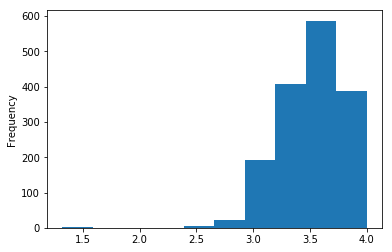

In [6]:
df_f['undergraduate gpa'].plot(kind='hist')

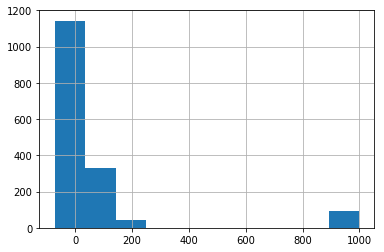

In [21]:
#df_f['lead_time'] = 
(df_f['response date'] - df_f['date acceptance letter sent']).apply(lambda x: x.days if x is not pd.NaT else 999).hist()

In [90]:
df_f.head()

,undergraduate gpa,first review exp,first review sop,first review gpa,first review lor,concentration/department interest,ethnicity,gender,first generation,response,response date,date acceptance letter sent,age
opportunity id,,,,,,,,,,,,,
006a000000ys36NAAQ,2.41,5.0,5.0,5.0,4.0,Mental Health,Unknown,Female,Yes,Confirmed,2013-04-08,2013-03-22,33.0
006a000000ys326AAA,2.78,5.0,5.0,3.0,5.0,Mental Health,Caucasian,Female,Yes,Withdrawn,2013-07-12,2013-03-29,56.0
006a000000ys2xEAAQ,2.81,5.0,5.0,3.0,5.0,Family and Children,Asian/Pacific Islander,Female,No,Withdrawn,2013-04-17,2013-04-05,29.0
006a000000ys34CAAQ,2.86,5.0,5.0,3.0,5.0,Family and Children,Native American,Female,No,Confirmed,2013-04-06,2013-04-05,34.0
006a000000zHwSiAAK,2.90,NaN,NaN,NaN,NaN,Family and Children,African American,Female,Yes,Confirmed,2013-04-08,2013-03-15,34.0


In [162]:
df_f = df_f.dropna(subset = ['response date', 'date acceptance letter sent']).shape
df_f.response.unique()

array(['Confirmed', 'Withdrawn', 'Deferred', 'VAC Switch'], dtype=object)

In [163]:
def date_diff(row):
    rd = row['response date']
    ad = row['date acceptance letter sent']
    return (rd - ad).days
df_f['date_diff'] = df_f.apply(date_diff, axis=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e24e860>,
      dtype=object)

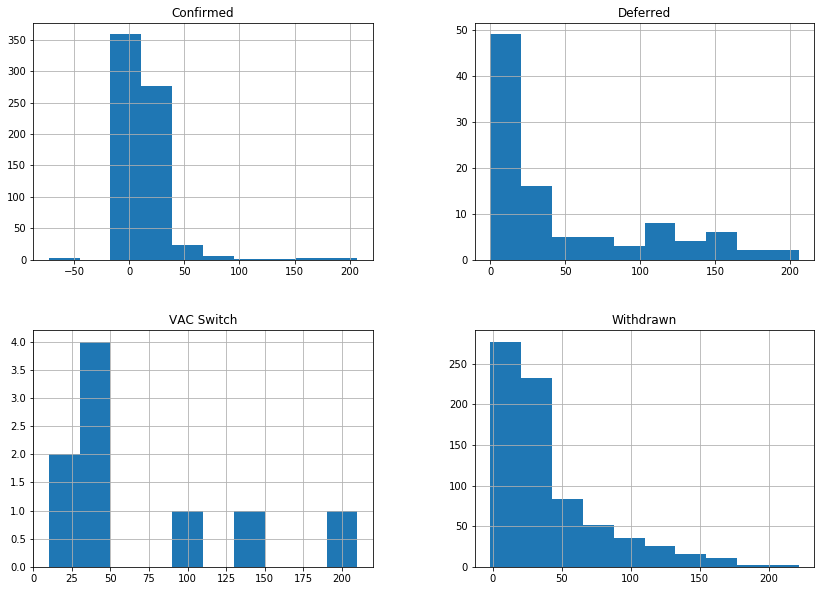

In [84]:
df_f.reset_index().loc[:,['response', 'date_diff']].pivot(columns='response', values = 'date_diff').hist(figsize=(14,10))

In [164]:
sorted(df_f['concentration/department interest'].unique()[pd.notna(df_f['concentration/department interest'].unique())])

['AHA Adults and Healthy Aging',
 'AMHW Adult Mental Health and Wellness',
 'COBI Community, Organization and Busines',
 'COBI Community, Organization and Business',
 'COBI Community, Organization and Business Innovation',
 'COPA',
 'CYF Children ,Youth and Families',
 'CYF Children, Youth, and Families',
 'Family & Children',
 'Family and Children',
 'Health',
 'Mental Health',
 'N',
 'None of the above:  I am not eligible fo',
 'SCI Social Change and Innovation',
 'Social Work Graduate Fair-USC, Los Angel',
 'Social Work and Business',
 'Workplace']

In [165]:
def clean_department(x):
    if x is np.nan:
        return 'Others'
    elif 'Adult' in x or 'Health' in x:
        return 'AMHW'
    elif 'Children' in x:
        return 'CYF'
    elif 'Social' in x or 'Organization' in x or 'COPA' in x:
        return 'SCI'
    else:
        return 'Others'
    
df_f['concentration/department interest'] = df_f['concentration/department interest'].apply(clean_department)

In [166]:
sorted(df_f['concentration/department interest'].unique()[~pd.isna(df_f['concentration/department interest'].unique())])

['AMHW', 'CYF', 'Others', 'SCI']

In [167]:
values = {'undergraduate gpa': df_f['undergraduate gpa'].mean(),
          'first review exp': df_f['first review exp'].mean(),
          'first review sop': df_f['first review sop'].mean(),
          'first review gpa': df_f['first review gpa'].mean(),
          'first review lor': df_f['first review lor'].mean()
         }
df_f = df_f.fillna(value=values)

In [168]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 14 columns):
undergraduate gpa                    1516 non-null float64
first review exp                     1516 non-null float64
first review sop                     1516 non-null float64
first review gpa                     1516 non-null float64
first review lor                     1516 non-null float64
concentration/department interest    1516 non-null object
ethnicity                            1516 non-null object
gender                               1516 non-null object
first generation                     1478 non-null object
response                             1516 non-null object
response date                        1516 non-null datetime64[ns]
date acceptance letter sent          1516 non-null datetime64[ns]
age                                  1516 non-null float64
date_diff                            1516 non-null int64
dtypes: datetime64[ns](2), float64

In [169]:
df_f['first generation'].unique()

array(['Yes', 'No', nan], dtype=object)

In [170]:
prob = df_f.loc[:,['first generation', 'response']].groupby(['first generation'])['response'].count()[1]/pd.notna(df_f['first generation']).sum()

def rand_firstgen(x):
    if x is np.nan:
        return np.random.binomial(1,prob)
    elif x == 'Yes':
        return 1
    else:
        return 0
    
    
df_f['first generation'] = df_f['first generation'].apply(rand_firstgen)


In [171]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 14 columns):
undergraduate gpa                    1516 non-null float64
first review exp                     1516 non-null float64
first review sop                     1516 non-null float64
first review gpa                     1516 non-null float64
first review lor                     1516 non-null float64
concentration/department interest    1516 non-null object
ethnicity                            1516 non-null object
gender                               1516 non-null object
first generation                     1516 non-null int64
response                             1516 non-null object
response date                        1516 non-null datetime64[ns]
date acceptance letter sent          1516 non-null datetime64[ns]
age                                  1516 non-null float64
date_diff                            1516 non-null int64
dtypes: datetime64[ns](2), float64(

In [172]:
df_f.gender.unique()

array(['Female', 'Male'], dtype=object)

In [173]:
def gender_to_binary(x):
    if 'female' in x.lower():
        return 0
    else:
        return 1
    
def response_to_binary(x):
    if 'withdraw' in x.lower():
        return 0
    else:
        return 1

df_f['gender'] = df_f['gender'].apply(gender_to_binary)
df_f['y'] = df_f['response'].apply(response_to_binary)
df_f['date_diff'] = df_f['date_diff'].astype(float)

In [174]:
pd.get_dummies(df_f, columns=['concentration/department interest','ethnicity']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 25 columns):
undergraduate gpa                           1516 non-null float64
first review exp                            1516 non-null float64
first review sop                            1516 non-null float64
first review gpa                            1516 non-null float64
first review lor                            1516 non-null float64
gender                                      1516 non-null int64
first generation                            1516 non-null int64
response                                    1516 non-null object
response date                               1516 non-null datetime64[ns]
date acceptance letter sent                 1516 non-null datetime64[ns]
age                                         1516 non-null float64
date_diff                                   1516 non-null float64
y                                           1516 non-null int64
co

In [175]:
pd.get_dummies(df_f, columns=['concentration/department interest','ethnicity']).drop(['response',
                                                                                          'response date',
                                                                                          'date acceptance letter sent',
                                                                                          'y'
                                                                                         ],axis=1)

,undergraduate gpa,first review exp,first review sop,first review gpa,first review lor,gender,first generation,age,date_diff,concentration/department interest_AMHW,...,concentration/department interest_Others,concentration/department interest_SCI,ethnicity_African American,ethnicity_Arab/Middle Eastern,ethnicity_Asian/Pacific Islander,ethnicity_Caucasian,ethnicity_Latino/a,ethnicity_Multi-Ethnic,ethnicity_Native American,ethnicity_Unknown
opportunity id,,,,,,,,,,,,,,,,,,,,,
006a000000ys36NAAQ,2.410000,5.000000,5.000000,5.000000,4.000000,0,1,33.0,17.0,1,...,0,0,0,0,0,0,0,0,0,1
006a000000ys326AAA,2.780000,5.000000,5.000000,3.000000,5.000000,0,1,56.0,105.0,1,...,0,0,0,0,0,1,0,0,0,0
006a000000ys2xEAAQ,2.810000,5.000000,5.000000,3.000000,5.000000,0,0,29.0,12.0,0,...,0,0,0,0,1,0,0,0,0,0
006a000000ys34CAAQ,2.860000,5.000000,5.000000,3.000000,5.000000,0,0,34.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
006a000000zHwSiAAK,2.900000,4.000664,4.656271,4.573324,4.452555,0,1,34.0,24.0,0,...,0,0,1,0,0,0,0,0,0,0
006a000000zHwQ5AAK,2.930000,4.000000,5.000000,3.000000,5.000000,0,1,29.0,4.0,0,...,0,0,0,0,0,0,0,0,0,1
006a000000zHwQ6AAK,2.940000,5.000000,4.000000,4.000000,4.000000,0,1,30.0,13.0,1,...,0,0,0,0,0,1,0,0,0,0
006a000000ys2xiAAA,3.000000,5.000000,5.000000,4.000000,4.000000,0,1,30.0,13.0,0,...,0,0,0,0,0,0,0,0,0,1
006a000000ys2vNAAQ,3.000000,3.000000,5.000000,4.000000,5.000000,0,0,31.0,4.0,0,...,0,0,0,0,0,1,0,0,0,0


In [176]:
X = pd.get_dummies(df_f, columns=['concentration/department interest','ethnicity']).drop(['response',
                                                                                          'response date',
                                                                                          'date acceptance letter sent',
                                                                                          'y'
                                                                                         ],axis=1).values
y = df_f.y.values

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

steps = [('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)
    
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
print("Training\n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = pipeline.predict(X_test)

print("Testing\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training
 [[299 152]
 [119 339]]
             precision    recall  f1-score   support

          0       0.72      0.66      0.69       451
          1       0.69      0.74      0.71       458

avg / total       0.70      0.70      0.70       909

Testing
 [[178 107]
 [ 79 243]]
             precision    recall  f1-score   support

          0       0.69      0.62      0.66       285
          1       0.69      0.75      0.72       322

avg / total       0.69      0.69      0.69       607



In [193]:
from sklearn.ensemble import RandomForestClassifier

steps = [('scaler', StandardScaler()),
         ('forest', RandomForestClassifier())]

pipeline = Pipeline(steps)
    
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
print("Training\n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = pipeline.predict(X_test)

print("Testing\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training
 [[449   2]
 [ 11 447]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       451
          1       1.00      0.98      0.99       458

avg / total       0.99      0.99      0.99       909

Testing
 [[227  58]
 [ 91 231]]
             precision    recall  f1-score   support

          0       0.71      0.80      0.75       285
          1       0.80      0.72      0.76       322

avg / total       0.76      0.75      0.75       607



In [189]:
print(df_f.groupby(['y'])['y'].count())
780/(1516)

y
0    736
1    780
Name: y, dtype: int64


0.5145118733509235

In [202]:
df_f.ethnicity.unique()

array(['Unknown', 'Caucasian', 'Asian/Pacific Islander',
       'Native American', 'African American', 'Latino/a', 'Multi-Ethnic',
       'Arab/Middle Eastern'], dtype=object)

In [204]:
df_f.ethnicity = df_f.ethnicity.astype('category')
df_f.gender = df_f.gender.astype('category')
df_f['first generation'] = df_f['first generation'].astype('category')
df_f['concentration/department interest'] = df_f['concentration/department interest'].astype('category')

X_rCV = df_f.drop(['response',
           'response date',
           'date acceptance letter sent',
           'y'], axis=1)
y_rCV = df_f.y

print(X_rCV.info())
X_rCV.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 006a000000ys36NAAQ to 006a000001LOiJMAA1
Data columns (total 11 columns):
undergraduate gpa                    1516 non-null float64
first review exp                     1516 non-null float64
first review sop                     1516 non-null float64
first review gpa                     1516 non-null float64
first review lor                     1516 non-null float64
concentration/department interest    1516 non-null category
ethnicity                            1516 non-null category
gender                               1516 non-null category
first generation                     1516 non-null category
age                                  1516 non-null float64
date_diff                            1516 non-null float64
dtypes: category(4), float64(7)
memory usage: 141.4+ KB
None


,undergraduate gpa,first review exp,first review sop,first review gpa,first review lor,concentration/department interest,ethnicity,gender,first generation,age,date_diff
opportunity id,,,,,,,,,,,
006a000000ys36NAAQ,2.41,5.000000,5.000000,5.000000,4.000000,AMHW,Unknown,0,1,33.0,17.0
006a000000ys326AAA,2.78,5.000000,5.000000,3.000000,5.000000,AMHW,Caucasian,0,1,56.0,105.0
006a000000ys2xEAAQ,2.81,5.000000,5.000000,3.000000,5.000000,CYF,Asian/Pacific Islander,0,0,29.0,12.0
006a000000ys34CAAQ,2.86,5.000000,5.000000,3.000000,5.000000,CYF,Native American,0,0,34.0,1.0
006a000000zHwSiAAK,2.90,4.000664,4.656271,4.573324,4.452555,CYF,African American,0,1,34.0,24.0


In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,7,10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'forest__n_estimators': n_estimators,
               'forest__max_features': max_features,
               'forest__max_depth': max_depth,
               'forest__min_samples_split': min_samples_split,
               'forest__min_samples_leaf': min_samples_leaf,
               'forest__bootstrap': bootstrap}

steps = [('scaler', StandardScaler()),
         ('forest', RandomForestClassifier())]

pipeline = Pipeline(steps)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
randomforest_cv = GridSearchCV(pipeline, param_grid, scoring='f1', cv=cv, verbose=2, n_jobs=5)

randomforest_cv.fit(X_train, y_train)
print(randomforest_cv.best_params_)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, 

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   21.2s


[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.9s
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800 
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600, total=   

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600, total=   2.1s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600, tot

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.2s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.2s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_

[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.9min


[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total= 

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=  

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, tot

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, total=   2.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000, total=   5.9s
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=  

[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  4.3min


[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.0s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, tot

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estim

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.0s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=140

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, tot

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200, tot

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000, total=   5.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estim

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.4s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=120

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, tot

[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  7.6min


[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800, total=   

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.8s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.8s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600, tot

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, total=   

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.6s
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800 
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600, total=   

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, tot

[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.2s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.8s
[CV] forest__bootstrap=True, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600, total=   

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estima

[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed: 12.0min


[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estim

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=140

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, tot

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400, tot

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estim

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=120

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimator

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, tot

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200, tot

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estim

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=120

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimator

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200, tot

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimator

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000, tot

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200 


[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed: 17.5min


[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200 
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estim

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=120

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimator

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000, tot

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimato

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000, tot

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estim

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=100

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000, total=   5.9s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_est

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, tota

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.4s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.4s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.4s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800, 

[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.4s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.4s
[CV] forest__bootstrap=True, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, 

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.9s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   6.0s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.9s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, t

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.2s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=8

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, fore

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800, tot

[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed: 23.9min


[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.4s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, to

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, fore

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_e

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.2s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, to

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.2s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.2s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=20

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, fore

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.1s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_e

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.8s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, total=   2.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, total=   2.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.6s
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, fore

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_est

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.9s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=180

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800, total=   2.6s
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000 
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_est

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=180

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimato

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estim

[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed: 31.6min


[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, tot

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=40

[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=True, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, fore

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimat

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200, total=   4.2s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.8s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimat

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_e

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimat

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.4s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estima

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.4s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.5s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest_

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_esti

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estim

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.2s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_e

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600, total=   2.1s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600, total=   2.1s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimat

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600, total=   2.1s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimat

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_e

[Parallel(n_jobs=5)]: Done 3271 tasks      | elapsed: 40.6min


[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200, total=   4.0s
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_s

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200 
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.8s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimato

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.4s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_es

[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estim

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200 
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.4s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.5s
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.5s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200 
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=1

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_spli

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_sp

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, f

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.6s
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000 
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, fo

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.1s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=1

[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.2s
[CV] forest__bootstrap=True, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_sp

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=60

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.6s
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, for

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=40

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, fore

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=40

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.5s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, fore

[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 50.0min


[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, fore

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.4s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.4s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, t

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, total=   2.4s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, to

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=80

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.7s
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800 
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, fore

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.7s
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800 
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600, total=   1.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=60

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, fore

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600, tot

[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400, total=   1.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=40

[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.2s
[CV] forest__bootstrap=False, forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimator

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, tot

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   1.3s
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estim

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.3s
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=40

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, fore

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, tot

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.2s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, to

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.6s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.2s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.2s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=20

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.8s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, fore

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200 
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.0s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, t

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=   0.6s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000, to

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.1s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_

[Parallel(n_jobs=5)]: Done 4891 tasks      | elapsed: 60.3min


[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.1s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, fore

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.6s
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_est

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, 

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.7s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, fore

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800, total=   2.5s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800, to

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800, tot

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=60

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.9s
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800 
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, fore

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=600, tot

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600, tot

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.0s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_

[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=400, total=   1.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, total=   1.9s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=60

[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.3s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.4s
[CV] forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600, total=   4.9s
[CV]  forest__bootstrap=False, forest__max_depth=7, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, for

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, total=   1.5s
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=60

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, fore

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=40

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, fore

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimat

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_es

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=40

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   4.1s
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.6s
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, for

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=40

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, fore

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimat

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_es

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=20

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, fore

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.5s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, fore

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimat

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 


[Parallel(n_jobs=5)]: Done 5822 tasks      | elapsed: 72.1min


[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.4s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.5s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest_

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.4s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.5s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimato

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.9s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.8s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest_

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.4s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimato

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.6s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.6s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, for

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.3s
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200 
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_es

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1800, total=   6.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.5s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_esti

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800, total=   3.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=800, total=   3.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.5s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800, total=   6.1s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1800, total=   6.1s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimato

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800, total=   2.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800, total=   2.8s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=800, total=   2.8s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest_

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800, total=   6.2s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1800, total=   6.2s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimato

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=800, total=   2.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, f

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.9s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=800, total=   2.6s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1600, total=   5.2s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1800, total=   5.9s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, fore

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800 
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=800, total=   2.7s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=8

[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.2s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.2s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, fore

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimat

[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.1s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.2s
[CV] forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_es

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600, total=   2.2s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=600, total=   2.2s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_e

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   6.1s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   6.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1600, total=   6.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_s

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=600, total=   2.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_e

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   5.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1400, total=   5.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=5, forest

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, fores

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=1, forest__min_samples_split=10, 

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_e

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1200, total=   4.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=2, forest

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=200, total=   0.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_e

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, fores

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   4.0s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=2, forest__min_samples_split=10, 

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_e

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200 
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.4s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.4s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.4s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=5, forest

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=800, total=   2.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, f

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.6s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1800, total=   5.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=auto, forest__min_samples_leaf=4, forest__min_samples_split=10, 

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.9s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=800, total=   2.9s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   6.6s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=1800, total=   6.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest__n_estimators=2000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=2, forest

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, total=   2.9s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=800, total=   2.9s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1000 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n

[Parallel(n_jobs=5)]: Done 6835 tasks      | elapsed: 85.9min


[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.5s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1600, total=   5.6s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=5, forest__n_estimators=1800 
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_s

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600, total=   2.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=800 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=600, total=   2.0s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_s

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1400, total=   4.6s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samples_split=10, forest__n_estimators=1600, total=   5.6s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=1, forest__min_samp

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=1400, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_s

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=400, total=   1.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1200, total=   4.2s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.9s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1600 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=5, forest__n_estimators=1400, total=   4.8s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_s

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=400, total=   1.4s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_s

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samples_split=10, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=2, forest__min_samp

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.9s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400 
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=1200, total=   3.9s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_s

[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=2, forest__n_estimators=2000, total=   6.5s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=400 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_e

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=1200, total=   4.1s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_s

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=5, forest__n_estimators=2000, total=   6.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=200, total=   0.7s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_s

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.3s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1200 
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=1000, total=   3.2s
[CV] forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samp

[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.3s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.4s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.3s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.3s
[CV]  forest__bootstrap=False, forest__max_depth=None, forest__max_features=sqrt, forest__min_samples_leaf=4, forest__min_samples_split=10, forest__n_estimators=2000, total=   6.1s


[Parallel(n_jobs=5)]: Done 7200 out of 7200 | elapsed: 90.9min finished


{'forest__bootstrap': True, 'forest__max_depth': 7, 'forest__max_features': 'sqrt', 'forest__min_samples_leaf': 1, 'forest__min_samples_split': 10, 'forest__n_estimators': 200}


In [209]:
pipeline.set_params(forest__bootstrap= True,
                    forest__max_depth= 7,
                    forest__max_features= 'sqrt',
                    forest__min_samples_leaf= 1,
                    forest__min_samples_split= 10,
                    forest__n_estimators= 200).fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
print("Training\n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = pipeline.predict(X_test)

print("Testing\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training
 [[368  83]
 [ 92 366]]
             precision    recall  f1-score   support

          0       0.80      0.82      0.81       451
          1       0.82      0.80      0.81       458

avg / total       0.81      0.81      0.81       909

Testing
 [[234  51]
 [ 68 254]]
             precision    recall  f1-score   support

          0       0.77      0.82      0.80       285
          1       0.83      0.79      0.81       322

avg / total       0.81      0.80      0.80       607

